# Importing Libraries and Data

In [1]:
%matplotlib inline
import numba

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
from IPython.display import display

from nltk.tokenize import word_tokenize, RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from nltk import FreqDist
from nltk.corpus import wordnet as wn

import string

import multiprocessing


/Users/zhangxinzhou/anaconda/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [2]:
attributes_raw = pd.read_csv('attributes.csv')
product_desc_raw = pd.read_csv('product_descriptions.csv')
test_raw = pd.read_csv('test.csv')
train_raw = pd.read_csv('train.csv')

In [3]:
attributes_raw.head(20)

,product_uid,name,value
0,100001.0,Bullet01,Versatile connector for various 90° connection...
1,100001.0,Bullet02,Stronger than angled nailing or screw fastenin...
2,100001.0,Bullet03,Help ensure joints are consistently straight a...
3,100001.0,Bullet04,Dimensions: 3 in. x 3 in. x 1-1/2 in.
4,100001.0,Bullet05,Made from 12-Gauge steel
5,100001.0,Bullet06,Galvanized for extra corrosion resistance
6,100001.0,Bullet07,Install with 10d common nails or #9 x 1-1/2 in...
7,100001.0,Gauge,12
8,100001.0,Material,Galvanized Steel
9,100001.0,MFG Brand Name,Simpson Strong-Tie


In [4]:
attributes_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2044803 entries, 0 to 2044802
Data columns (total 3 columns):
product_uid    float64
name           object
value          object
dtypes: float64(1), object(2)
memory usage: 46.8+ MB


In [5]:
product_desc_raw.head(20)

,product_uid,product_description
0,100001,"Not only do angles make joints stronger, they ..."
1,100002,BEHR Premium Textured DECKOVER is an innovativ...
2,100003,Classic architecture meets contemporary design...
3,100004,The Grape Solar 265-Watt Polycrystalline PV So...
4,100005,Update your bathroom with the Delta Vero Singl...
5,100006,Achieving delicious results is almost effortle...
6,100007,The Quantum Adjustable 2-Light LED Black Emerg...
7,100008,The Teks #10 x 1-1/2 in. Zinc-Plated Steel Was...
8,100009,Get the House of Fara 3/4 in. x 3 in. x 8 ft. ...
9,100010,Valley View Industries Metal Stakes (4-Pack) a...


In [6]:
product_desc_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124428 entries, 0 to 124427
Data columns (total 2 columns):
product_uid            124428 non-null int64
product_description    124428 non-null object
dtypes: int64(1), object(1)
memory usage: 1.9+ MB


In [7]:
train_raw.head(20)

,id,product_uid,product_title,search_term,relevance
0,2,100001,Simpson Strong-Tie 12-Gauge Angle,angle bracket,3.00
1,3,100001,Simpson Strong-Tie 12-Gauge Angle,l bracket,2.50
2,9,100002,BEHR Premium Textured DeckOver 1-gal. #SC-141 ...,deck over,3.00
3,16,100005,Delta Vero 1-Handle Shower Only Faucet Trim Ki...,rain shower head,2.33
4,17,100005,Delta Vero 1-Handle Shower Only Faucet Trim Ki...,shower only faucet,2.67
5,18,100006,Whirlpool 1.9 cu. ft. Over the Range Convectio...,convection otr,3.00
6,20,100006,Whirlpool 1.9 cu. ft. Over the Range Convectio...,microwave over stove,2.67
7,21,100006,Whirlpool 1.9 cu. ft. Over the Range Convectio...,microwaves,3.00
8,23,100007,Lithonia Lighting Quantum 2-Light Black LED Em...,emergency light,2.67
9,27,100009,House of Fara 3/4 in. x 3 in. x 8 ft. MDF Flut...,mdf 3/4,3.00


In [8]:
train_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74067 entries, 0 to 74066
Data columns (total 5 columns):
id               74067 non-null int64
product_uid      74067 non-null int64
product_title    74067 non-null object
search_term      74067 non-null object
relevance        74067 non-null float64
dtypes: float64(1), int64(2), object(2)
memory usage: 2.8+ MB


In [9]:
test_raw.head(20)

,id,product_uid,product_title,search_term
0,1,100001,Simpson Strong-Tie 12-Gauge Angle,90 degree bracket
1,4,100001,Simpson Strong-Tie 12-Gauge Angle,metal l brackets
2,5,100001,Simpson Strong-Tie 12-Gauge Angle,simpson sku able
3,6,100001,Simpson Strong-Tie 12-Gauge Angle,simpson strong ties
4,7,100001,Simpson Strong-Tie 12-Gauge Angle,simpson strong tie hcc668
5,8,100001,Simpson Strong-Tie 12-Gauge Angle,wood connectors
6,10,100003,STERLING Ensemble 33-1/4 in. x 60 in. x 75-1/4...,bath and shower kit
7,11,100003,STERLING Ensemble 33-1/4 in. x 60 in. x 75-1/4...,bath drain kit
8,12,100003,STERLING Ensemble 33-1/4 in. x 60 in. x 75-1/4...,one piece tub shower
9,13,100004,Grape Solar 265-Watt Polycrystalline Solar Pan...,solar panel


# Data Wrangling

In [10]:
train_merged = train_raw.merge(product_desc_raw, on='product_uid', how='left')
train_merged.tail(20)

,id,product_uid,product_title,search_term,relevance,product_description
74047,221413,206601,3M Tekk Protection White Vented Hard Hat with ...,hard hat with mining,1.67,3M TEKK Protection Vented Pro Ratchet Hard Hat...
74048,221415,206602,Hy-Lite Glass Block Fixed Vinyl Windows Driftw...,replace a broken glass in a vinyl window,2.00,Excellent privacy and decorative solution for ...
74049,221416,206603,Westinghouse 3 ft. Oil Rubbed Bronze Beaded Ch...,ceiling fan with chain cord,1.00,This Westinghouse Lighting Oil Rubbed Bronze B...
74050,221419,206606,BEHR Premium Plus #ICC-101 Florentine Clay Zer...,florentine clay,2.33,"BEHR Premium Plus Zero VOC, Self-Priming Inter..."
74051,221420,206607,Home Legend Palace Oak Light 3/4 in. Thick x 3...,trim a home lights,2.00,Quarter round is typically placed in front of ...
74052,221422,206609,Whitehaus Collection Isabella Wall-Mounted Bat...,whitehaus bathroom sinl,2.33,Beautify your bathroom or powder room with a W...
74053,221423,206610,Champion Power Equipment 6.5 HP Gas-Powered 3 ...,6.5 hp gas generator,2.33,The Champion Power Equipment 3 in. semi-trash ...
74054,221426,206613,Everbilt 4 in. White Wall Guard,splash guard for wall,2.00,The Everbilt 4 in. Wall Guard helps prevent da...
74055,221427,206614,Daltile Villa Valleta Calais Springs 18 in. x ...,spicewood springs floor tile,1.67,This dal-tile villa valleta calais springs por...
74056,221432,206619,Home Styles Stone Harbor 51 in. Round 7-Piece ...,laguna porcelin tile,2.00,Stone Harbor 7-Piece Dining Set includes Large...


In [11]:
def remove_non_ascii(s):
    printable = set(string.printable)
    return filter(lambda x: x in printable, s)

In [12]:
train_merged['product_title'] = train_merged['product_title'].apply(remove_non_ascii)
train_merged['product_description'] = train_merged['product_description'].apply(remove_non_ascii)
train_merged['search_term'] = train_merged['search_term'].apply(remove_non_ascii)

In [13]:
df = train_merged[train_merged['id']==1060]
print df

       id  product_uid                                      product_title  \
323  1060       100179  Paslode 3 in. x 0.120-Gauge 30 Galvanized Ring...   

                  search_term  relevance  \
323  galvanized framing nails       2.67   

                                   product_description  
323  For exterior applications like framing of sill...  


In [14]:
def tokenize_text(text):
    tokenizer = RegexpTokenizer(r'\w+')
    return tokenizer.tokenize(text)

def remove_stopwords(text):
    stops = stopwords.words('english')
    return [word for word in text if word not in stops]

def get_words_stem(tokenized_text):
    lemmatizer = WordNetLemmatizer()
    return map(lemmatizer.lemmatize, tokenized_text)


In [15]:
train_merged['product_title'] = train_merged['product_title'].apply(tokenize_text)
train_merged['product_description'] = train_merged['product_description'].apply(tokenize_text)
train_merged['search_term'] = train_merged['search_term'].apply(tokenize_text)

In [16]:
train_merged.head()

,id,product_uid,product_title,search_term,relevance,product_description
0,2,100001,"[Simpson, Strong, Tie, 12, Gauge, Angle]","[angle, bracket]",3.00,"[Not, only, do, angles, make, joints, stronger..."
1,3,100001,"[Simpson, Strong, Tie, 12, Gauge, Angle]","[l, bracket]",2.50,"[Not, only, do, angles, make, joints, stronger..."
2,9,100002,"[BEHR, Premium, Textured, DeckOver, 1, gal, SC...","[deck, over]",3.00,"[BEHR, Premium, Textured, DECKOVER, is, an, in..."
3,16,100005,"[Delta, Vero, 1, Handle, Shower, Only, Faucet,...","[rain, shower, head]",2.33,"[Update, your, bathroom, with, the, Delta, Ver..."
4,17,100005,"[Delta, Vero, 1, Handle, Shower, Only, Faucet,...","[shower, only, faucet]",2.67,"[Update, your, bathroom, with, the, Delta, Ver..."


In [17]:
train_merged['product_title'] = train_merged['product_title'].apply(remove_stopwords)
train_merged['product_description'] = train_merged['product_description'].apply(remove_stopwords)
train_merged['search_term'] = train_merged['search_term'].apply(remove_stopwords)

In [18]:
train_merged.head()

,id,product_uid,product_title,search_term,relevance,product_description
0,2,100001,"[Simpson, Strong, Tie, 12, Gauge, Angle]","[angle, bracket]",3.00,"[Not, angles, make, joints, stronger, also, pr..."
1,3,100001,"[Simpson, Strong, Tie, 12, Gauge, Angle]","[l, bracket]",2.50,"[Not, angles, make, joints, stronger, also, pr..."
2,9,100002,"[BEHR, Premium, Textured, DeckOver, 1, gal, SC...",[deck],3.00,"[BEHR, Premium, Textured, DECKOVER, innovative..."
3,16,100005,"[Delta, Vero, 1, Handle, Shower, Only, Faucet,...","[rain, shower, head]",2.33,"[Update, bathroom, Delta, Vero, Single, Handle..."
4,17,100005,"[Delta, Vero, 1, Handle, Shower, Only, Faucet,...","[shower, faucet]",2.67,"[Update, bathroom, Delta, Vero, Single, Handle..."


In [19]:
train_merged['product_title'] = train_merged['product_title'].apply(get_words_stem)
train_merged['product_description'] = train_merged['product_description'].apply(get_words_stem)
train_merged['search_term'] = train_merged['search_term'].apply(get_words_stem)

In [20]:
train_merged.head()

,id,product_uid,product_title,search_term,relevance,product_description
0,2,100001,"[Simpson, Strong, Tie, 12, Gauge, Angle]","[angle, bracket]",3.00,"[Not, angle, make, joint, stronger, also, prov..."
1,3,100001,"[Simpson, Strong, Tie, 12, Gauge, Angle]","[l, bracket]",2.50,"[Not, angle, make, joint, stronger, also, prov..."
2,9,100002,"[BEHR, Premium, Textured, DeckOver, 1, gal, SC...",[deck],3.00,"[BEHR, Premium, Textured, DECKOVER, innovative..."
3,16,100005,"[Delta, Vero, 1, Handle, Shower, Only, Faucet,...","[rain, shower, head]",2.33,"[Update, bathroom, Delta, Vero, Single, Handle..."
4,17,100005,"[Delta, Vero, 1, Handle, Shower, Only, Faucet,...","[shower, faucet]",2.67,"[Update, bathroom, Delta, Vero, Single, Handle..."


In [21]:
train_merged['product_title_len'] = train_merged['product_title'].apply(len)
train_merged['product_description_len'] = train_merged['product_description'].apply(len)
train_merged['search_term_len'] = train_merged['search_term'].apply(len)

In [22]:
train_merged.head()

,id,product_uid,product_title,search_term,relevance,product_description,product_title_len,product_description_len,search_term_len
0,2,100001,"[Simpson, Strong, Tie, 12, Gauge, Angle]","[angle, bracket]",3.00,"[Not, angle, make, joint, stronger, also, prov...",6,96,2
1,3,100001,"[Simpson, Strong, Tie, 12, Gauge, Angle]","[l, bracket]",2.50,"[Not, angle, make, joint, stronger, also, prov...",6,96,2
2,9,100002,"[BEHR, Premium, Textured, DeckOver, 1, gal, SC...",[deck],3.00,"[BEHR, Premium, Textured, DECKOVER, innovative...",12,126,1
3,16,100005,"[Delta, Vero, 1, Handle, Shower, Only, Faucet,...","[rain, shower, head]",2.33,"[Update, bathroom, Delta, Vero, Single, Handle...",13,72,3
4,17,100005,"[Delta, Vero, 1, Handle, Shower, Only, Faucet,...","[shower, faucet]",2.67,"[Update, bathroom, Delta, Vero, Single, Handle...",13,72,2


## try to find the similarity among the search term and the description and product title

### experiment on the single row:

#### extract the text, tokenize the sentences and clean up the text

In [ ]:
from nltk.tokenize import word_tokenize, RegexpTokenizer

In [ ]:
#tokenize and remove punctuation
tokenizer = RegexpTokenizer(r'\w+')
texts_t = [tokenizer.tokenize(t) for t in texts]

In [ ]:
#remove stopwords
from nltk.corpus import stopwords

def remove_stopwords(text):
    return [word for word in text if word not in stopwords.words('english')]
    
texts_t = map(remove_stopwords, texts_t)

In [ ]:
#remove suffix of the words
from nltk.stem.wordnet import WordNetLemmatizer
def get_words_stem(tokenized_text):
    lemmatizer = WordNetLemmatizer()
    return map(lemmatizer.lemmatize, tokenized_text)

texts_t = map(get_words_stem, texts_t)

#### use freqdist() to check the frequencies of each word and compare it with the search term

In [ ]:
from nltk import FreqDist

In [ ]:
def get_freq_in_text(text, word):
#     print text
    freq = FreqDist(text)
    return freq[word]

In [ ]:
texts_t

In [ ]:
for word in texts_t[1]:
    print word
    print 'freq in title: ', get_freq_in_text(texts_t[0], word)
    print 'freq in desc: ', get_freq_in_text(texts_t[2], word)

#### use synsets module to check simlilarity

 ##### method:
* text_words
    * word
    * word
    * word
    * word
        * synset1 <-loop through each synset
        * synset2
        * synset3
        
 compared to:
    * ref_word
        * synset1
        * synset2
 
 find the max similarity between eg word:synset1 and ref_word:synset2
 
 append this simliarity into word's syn_sims
 
 find the max similarity between word:synset2 and the ref_word's synsets
 ...
 until each synset in the word has found the max similarity to the ref_word
 
 then return the max value of the word's syn_sims list to represent the similarity of the word to the ref_word
 

In [ ]:
kw = texts_t[1][1]
kw

In [ ]:
kw_syn = wn.synsets(kw)
kw_syn

In [ ]:
def compare_synsets(synsets1, synsets2):
    comparisons = [syn1.path_similarity(syn2) for syn2 in synsets2 for syn1 in synsets1]
    comparisons = [v for v in comparisons if v is not None]
    return sum(comparisons)

In [ ]:
def get_synsets(word):
    return wn.synsets(word)

In [ ]:
def check_similarity_word_words(ref_word_synsets, words):
    synsets_of_all_words = [wn.synsets(word) for word in words]
#     print synsets_of_all_words
    sim_word_to_word  = [compare_synsets(ref_word_synsets, synsets) for synsets in synsets_of_all_words]
    return sum(sim_word_to_word)

In [ ]:
print kw, kw_syn, texts_t[0]
sim_kw_title = check_similarity_word_words(kw_syn, texts_t[0])
kw, sim_kw_title

* check similarity between search key word and the product description

In [ ]:
sim_kw_desc = check_similarity_word_words(kw_syn, texts_t[2])
kw, sim_kw_desc

* mean values of the similarities

In [ ]:
def cal_similarities_mean(similarities_list):
    sims = [v for k,v in similarities_list.iteritems()]
    #drop na
    sims = np.array([e for e in sims if e != None])
    return sims.mean()

In [ ]:
# sim_kw_title_mean =cal_similarities_mean(sim_kw_title)
# print sim_kw_title_mean

# sim_kw_desc_mean = cal_similarities_mean(sim_kw_desc)
# print sim_kw_desc_mean

### run on all rows

In [23]:
def get_freq_in_text(text, word):
#     print text
    freq = FreqDist(text)
    return freq[word]

def compare_synsets(synsets1, synsets2):
    comparisons = [syn1.path_similarity(syn2) for syn2 in synsets2 for syn1 in synsets1]
    comparisons = [v for v in comparisons if v is not None]
    if len(comparisons) > 0:
        return max(comparisons)
    else:
        return 0

def check_similarity_word_words(ref_word_synsets, words):
    synsets_of_all_words = [wn.synsets(word) for word in words]
#     print synsets_of_all_words
    sim_word_to_word  = [compare_synsets(ref_word_synsets, synsets) for synsets in synsets_of_all_words]
    sim_word_to_word = [v for v in sim_word_to_word if v > 0]
    if len(sim_word_to_word) > 0:
        return np.mean(np.array(sim_word_to_word))
    else:
        return 0

In [24]:
# core function to find the similarity between the search term and the target text
def find_search_similarity_title_desc(row,title_col_name,search_col_name, desc_col_name, mode):
#     print type(row)
    texts = [row[title_col_name],row[search_col_name],row[desc_col_name] ]
#     print texts
    
    sim_kw_title_mean_all = {}
    sim_kw_desc_mean_all = {}
    
    for kw in texts[1]:
#         print 'keyword: ', kw
        #get the synsets of the keyword
        kw_syn = wn.synsets(kw)
        #get the similarity matrix of kw:product_title
        sim_kw_title_mean = check_similarity_word_words(kw_syn, texts[0])
        #get the similarity matrix of kw:product_description
        sim_kw_desc_mean = check_similarity_word_words(kw_syn, texts[2])
    
        sim_kw_title_mean_all[kw] = sim_kw_title_mean
        sim_kw_desc_mean_all[kw] = sim_kw_desc_mean
    
    
    sim_title_mean_np = np.array(sim_kw_title_mean_all.values())
    sim_desc_mean_np = np.array(sim_kw_desc_mean_all.values())
    
    sim_title_mean_val = np.mean(sim_title_mean_np)
    sim_desc_mean_val = np.mean(sim_desc_mean_np)
    
#     print 'sim means: ', sim_title_mean_val, sim_desc_mean_val
    if mode =='title':
#         print 'row id: ', row.id, ', return: ', sim_title_mean_val
        return sim_title_mean_val
    elif mode == 'desc':
#         print 'row id: ', row.id, ', return: ', sim_desc_mean_val
        return sim_desc_mean_val
    else:
#         print 'row id: ', row.id, ', return: ', (sim_title_mean_val + sim_desc_mean_val)/2
        return (sim_title_mean_val + sim_desc_mean_val)/2

In [34]:
# wrapper functions so that the pool.map() can call the core function
def find_search_similarity_title(row_number):
    return find_search_similarity_title_desc(train_merged.iloc[row_number, :],'product_title','search_term', 'product_description', 'title')

def find_search_similarity_desc(row_number):
    return find_search_similarity_title_desc(train_merged.iloc[row_number, :],'product_title','search_term', 'product_description', 'desc')

In [26]:
def find_search_freq_title_desc(row,title_col_name,search_col_name, desc_col_name, mode):
#     print 'row id: ', row.id
    texts = [row[title_col_name],row[search_col_name],row[desc_col_name] ]
    
    if mode == 'title':
        counts = [get_freq_in_text(texts[0], kw) for kw in texts[1]]
#         print counts
        f = sum(counts)
    elif mode == 'desc':
        counts = [get_freq_in_text(texts[2], kw) for kw in texts[1]] 
        f = sum(counts)
    else:
        f = (sum([get_freq_in_text(texts[0], kw) for kw in texts[1]]) + sum([get_freq_in_text(texts[2], kw) for kw in texts[1]]))/2
#     print 'f: ', f
    return f

In [27]:
train_merged_sub = train_merged.iloc[0:100, :]
train_merged_sub.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 0 to 99
Data columns (total 9 columns):
id                         100 non-null int64
product_uid                100 non-null int64
product_title              100 non-null object
search_term                100 non-null object
relevance                  100 non-null float64
product_description        100 non-null object
product_title_len          100 non-null int64
product_description_len    100 non-null int64
search_term_len            100 non-null int64
dtypes: float64(1), int64(5), object(3)
memory usage: 7.8+ KB


In [28]:
%timeit train_merged['freq_title_sum'] = train_merged.apply(lambda row: find_search_freq_title_desc(row, 'product_title','search_term', 'product_description', mode='title'), axis=1)
%timeit train_merged['freq_desc_sum'] = train_merged.apply(lambda row: find_search_freq_title_desc(row, 'product_title','search_term', 'product_description', mode='desc'), axis=1)

1 loop, best of 3: 10.9 s per loop
1 loop, best of 3: 24.7 s per loop


In [29]:
train_merged.head()

,id,product_uid,product_title,search_term,relevance,product_description,product_title_len,product_description_len,search_term_len,freq_title_sum,freq_desc_sum
0,2,100001,"[Simpson, Strong, Tie, 12, Gauge, Angle]","[angle, bracket]",3.00,"[Not, angle, make, joint, stronger, also, prov...",6,96,2,0,2
1,3,100001,"[Simpson, Strong, Tie, 12, Gauge, Angle]","[l, bracket]",2.50,"[Not, angle, make, joint, stronger, also, prov...",6,96,2,0,0
2,9,100002,"[BEHR, Premium, Textured, DeckOver, 1, gal, SC...",[deck],3.00,"[BEHR, Premium, Textured, DECKOVER, innovative...",12,126,1,0,3
3,16,100005,"[Delta, Vero, 1, Handle, Shower, Only, Faucet,...","[rain, shower, head]",2.33,"[Update, bathroom, Delta, Vero, Single, Handle...",13,72,3,0,0
4,17,100005,"[Delta, Vero, 1, Handle, Shower, Only, Faucet,...","[shower, faucet]",2.67,"[Update, bathroom, Delta, Vero, Single, Handle...",13,72,2,0,0


In [32]:
%%time 
print len(train_merged)
if __name__ == '__main__':
    pool = multiprocessing.Pool(processes=16)
    train_merged['sim_title'] = pool.map(find_search_similarity_title, range(0, len(train_merged)))

    pool.close() #we are not adding any more processes
    pool.join() #tell it to wait until all threads are done before going on


74067


IndexError: single positional indexer is out-of-bounds

In [48]:
train_merged.head()

,id,product_uid,product_title,search_term,relevance,product_description,product_title_len,product_description_len,search_term_len,freq_title_sum,freq_desc_sum,sim_title
0,2,100001,"[Simpson, Strong, Tie, 12, Gauge, Angle]","[angle, bracket]",3.00,"[Not, angle, make, joint, stronger, also, prov...",6,96,2,0,2,0.275694
1,3,100001,"[Simpson, Strong, Tie, 12, Gauge, Angle]","[l, bracket]",2.50,"[Not, angle, make, joint, stronger, also, prov...",6,96,2,0,0,0.171313
2,9,100002,"[BEHR, Premium, Textured, DeckOver, 1, gal, SC...",[deck],3.00,"[BEHR, Premium, Textured, DECKOVER, innovative...",12,126,1,0,3,0.187879
3,16,100005,"[Delta, Vero, 1, Handle, Shower, Only, Faucet,...","[rain, shower, head]",2.33,"[Update, bathroom, Delta, Vero, Single, Handle...",13,72,3,0,0,0.228968
4,17,100005,"[Delta, Vero, 1, Handle, Shower, Only, Faucet,...","[shower, faucet]",2.67,"[Update, bathroom, Delta, Vero, Single, Handle...",13,72,2,0,0,0.220725


In [33]:
%%time
if __name__ == '__main__':
    pool = multiprocessing.Pool(processes=16)
    train_merged['sim_desc'] = pool.map(find_search_similarity_desc, range(0, len(train_merged)))
    
    pool.close() #we are not adding any more processes
    pool.join() #tell it to wait until all threads are done before going on


IndexError: single positional indexer is out-of-bounds

In [50]:
train_merged.tail(20)

,id,product_uid,product_title,search_term,relevance,product_description,product_title_len,product_description_len,search_term_len,freq_title_sum,freq_desc_sum,sim_title,sim_desc
80,290,100050,"[Hampton, Bay, Beverly, Patio, Dining, Arm, Ch...","[outdoor, dining]",2.67,"[Sit, back, relax, comfort, style, Beverly, Pa...",11,133,2,0,3,0.118770,0.587471
81,293,100051,"[Hampton, Bay, Spring, Haven, Brown, All, Weat...","[cushion, outdoorlounge]",3.00,"[Soak, outdoors, Spring, Haven, Brown, Wicker,...",14,89,2,0,2,0.114427,0.096461
82,294,100051,"[Hampton, Bay, Spring, Haven, Brown, All, Weat...","[hampton, bay, spring]",3.00,"[Soak, outdoors, Spring, Haven, Brown, Wicker,...",14,89,3,0,0,0.209326,0.171008
83,297,100051,"[Hampton, Bay, Spring, Haven, Brown, All, Weat...",[outdoorfurniture],2.33,"[Soak, outdoors, Spring, Haven, Brown, Wicker,...",14,89,1,0,0,0.000000,0.000000
84,305,100053,"[60, x, 150, ft, 10, 10, Remesh]",[wiremesh],3.00,"[The, 60, x, 150, ft, 10, 10, Remesh, provides...",7,50,1,0,0,0.000000,0.000000
85,314,100054,"[Stanley, Doors, 36, x, 80, Chatham, 3, 4, Lit...","[front, door]",3.00,"[Stanley, Doors, help, create, entrance, exten...",16,171,2,0,5,0.262252,0.206339
86,318,100054,"[Stanley, Doors, 36, x, 80, Chatham, 3, 4, Lit...","[prehung, steel, door]",3.00,"[Stanley, Doors, help, create, entrance, exten...",16,171,3,0,6,0.181489,0.143362
87,319,100054,"[Stanley, Doors, 36, x, 80, Chatham, 3, 4, Lit...","[stanley, door]",2.67,"[Stanley, Doors, help, create, entrance, exten...",16,171,2,0,6,0.225780,0.185724
88,323,100055,"[MOEN, Essie, Single, Handle, Pull, Down, Spra...","[kingsley, moen, kitchen, faucet]",2.33,"[The, Essie, faucet, Spot, Resist, Stainless, ...",14,111,4,0,3,0.089404,0.058719
89,327,100055,"[MOEN, Essie, Single, Handle, Pull, Down, Spra...","[kitchen, sink, faucet]",3.00,"[The, Essie, faucet, Spot, Resist, Stainless, ...",14,111,3,0,3,0.183204,0.147964


In [52]:
train_merged['ratio_title'] = train_merged['freq_title_sum'] / train_merged['product_title_len']
train_merged['ratio_desc'] = train_merged['freq_desc_sum'] / train_merged['product_description_len']

/Users/zhangxinzhou/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Users/zhangxinzhou/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [53]:
train_merged.head()
train_merged.to_csv('train_merged_with_features.csv')

,id,product_uid,product_title,search_term,relevance,product_description,product_title_len,product_description_len,search_term_len,freq_title_sum,freq_desc_sum,sim_title,sim_desc,ratio_title,ratio_desc
0,2,100001,"[Simpson, Strong, Tie, 12, Gauge, Angle]","[angle, bracket]",3.00,"[Not, angle, make, joint, stronger, also, prov...",6,96,2,0,2,0.275694,0.238338,0.0,0.020833
1,3,100001,"[Simpson, Strong, Tie, 12, Gauge, Angle]","[l, bracket]",2.50,"[Not, angle, make, joint, stronger, also, prov...",6,96,2,0,0,0.171313,0.177538,0.0,0.000000
2,9,100002,"[BEHR, Premium, Textured, DeckOver, 1, gal, SC...",[deck],3.00,"[BEHR, Premium, Textured, DECKOVER, innovative...",12,126,1,0,3,0.187879,0.238787,0.0,0.023810
3,16,100005,"[Delta, Vero, 1, Handle, Shower, Only, Faucet,...","[rain, shower, head]",2.33,"[Update, bathroom, Delta, Vero, Single, Handle...",13,72,3,0,0,0.228968,0.213623,0.0,0.000000
4,17,100005,"[Delta, Vero, 1, Handle, Shower, Only, Faucet,...","[shower, faucet]",2.67,"[Update, bathroom, Delta, Vero, Single, Handle...",13,72,2,0,0,0.220725,0.150104,0.0,0.000000


* multiple linear regression
* SVM
* random forest

* vis: scatter matrix
   * confusion matrix
   * roc curve
   * word cloud: https://github.com/shubhabrataroy/Thinkful/blob/master/Curriculum/SetNoteBook.ipynb


## Data Exploring

In [47]:
train_merged_f = pd.read_csv('train_merged_with_features.csv')
train_merged_f = train_merged_f.dropna()

In [48]:
train_merged_f.head()

,Unnamed: 0,id,product_uid,product_title,search_term,relevance,product_description,product_title_len,product_description_len,search_term_len,freq_title_sum,freq_desc_sum,sim_title,sim_desc,ratio_title,ratio_desc
0,0,2,100001,"['Simpson', 'Strong', 'Tie', '12', 'Gauge', 'A...","['angle', 'bracket']",3.00,"['Not', u'angle', 'make', u'joint', 'stronger'...",6,96,2,0,2,0.275694,0.238338,0.0,0.020833
1,1,3,100001,"['Simpson', 'Strong', 'Tie', '12', 'Gauge', 'A...","['l', 'bracket']",2.50,"['Not', u'angle', 'make', u'joint', 'stronger'...",6,96,2,0,0,0.171313,0.177538,0.0,0.000000
2,2,9,100002,"['BEHR', 'Premium', 'Textured', 'DeckOver', '1...",['deck'],3.00,"['BEHR', 'Premium', 'Textured', 'DECKOVER', 'i...",12,126,1,0,3,0.187879,0.238787,0.0,0.023810
3,3,16,100005,"['Delta', 'Vero', '1', 'Handle', 'Shower', 'On...","['rain', 'shower', 'head']",2.33,"['Update', 'bathroom', 'Delta', 'Vero', 'Singl...",13,72,3,0,0,0.228968,0.213623,0.0,0.000000
4,4,17,100005,"['Delta', 'Vero', '1', 'Handle', 'Shower', 'On...","['shower', 'faucet']",2.67,"['Update', 'bathroom', 'Delta', 'Vero', 'Singl...",13,72,2,0,0,0.220725,0.150104,0.0,0.000000


In [22]:
train_merged_f.describe()

,Unnamed: 0,id,product_uid,relevance,product_title_len,product_description_len,search_term_len,freq_title_sum,freq_desc_sum,sim_title,sim_desc,ratio_title,ratio_desc
count,74067.000000,74067.000000,74067.000000,74067.000000,74067.000000,74067.000000,74067.000000,74067.000000,74067.000000,74057.000000,74057.000000,74067.000000,74067.000000
mean,37033.000000,112385.709223,142331.911553,2.381634,11.411924,101.483319,3.103109,0.290872,3.262519,0.209484,0.168278,0.024494,0.034976
std,21381.445531,64016.573650,30770.774864,0.533984,3.942178,57.067536,1.231630,0.908511,3.671788,0.100318,0.087809,0.073089,0.036351
min,0.000000,2.000000,100001.000000,1.000000,1.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18516.500000,57163.500000,115128.500000,2.000000,9.000000,61.000000,2.000000,0.000000,1.000000,NaN,NaN,0.000000,0.006803
50%,37033.000000,113228.000000,137334.000000,2.330000,11.000000,87.000000,3.000000,0.000000,2.000000,NaN,NaN,0.000000,0.025974
75%,55549.500000,168275.500000,166883.500000,3.000000,14.000000,126.000000,4.000000,0.000000,5.000000,NaN,NaN,0.000000,0.051724
max,74066.000000,221473.000000,206650.000000,3.000000,34.000000,917.000000,15.000000,20.000000,85.000000,1.000000,1.000000,1.375000,0.550000


In [6]:
from pandas.tools.plotting import scatter_matrix

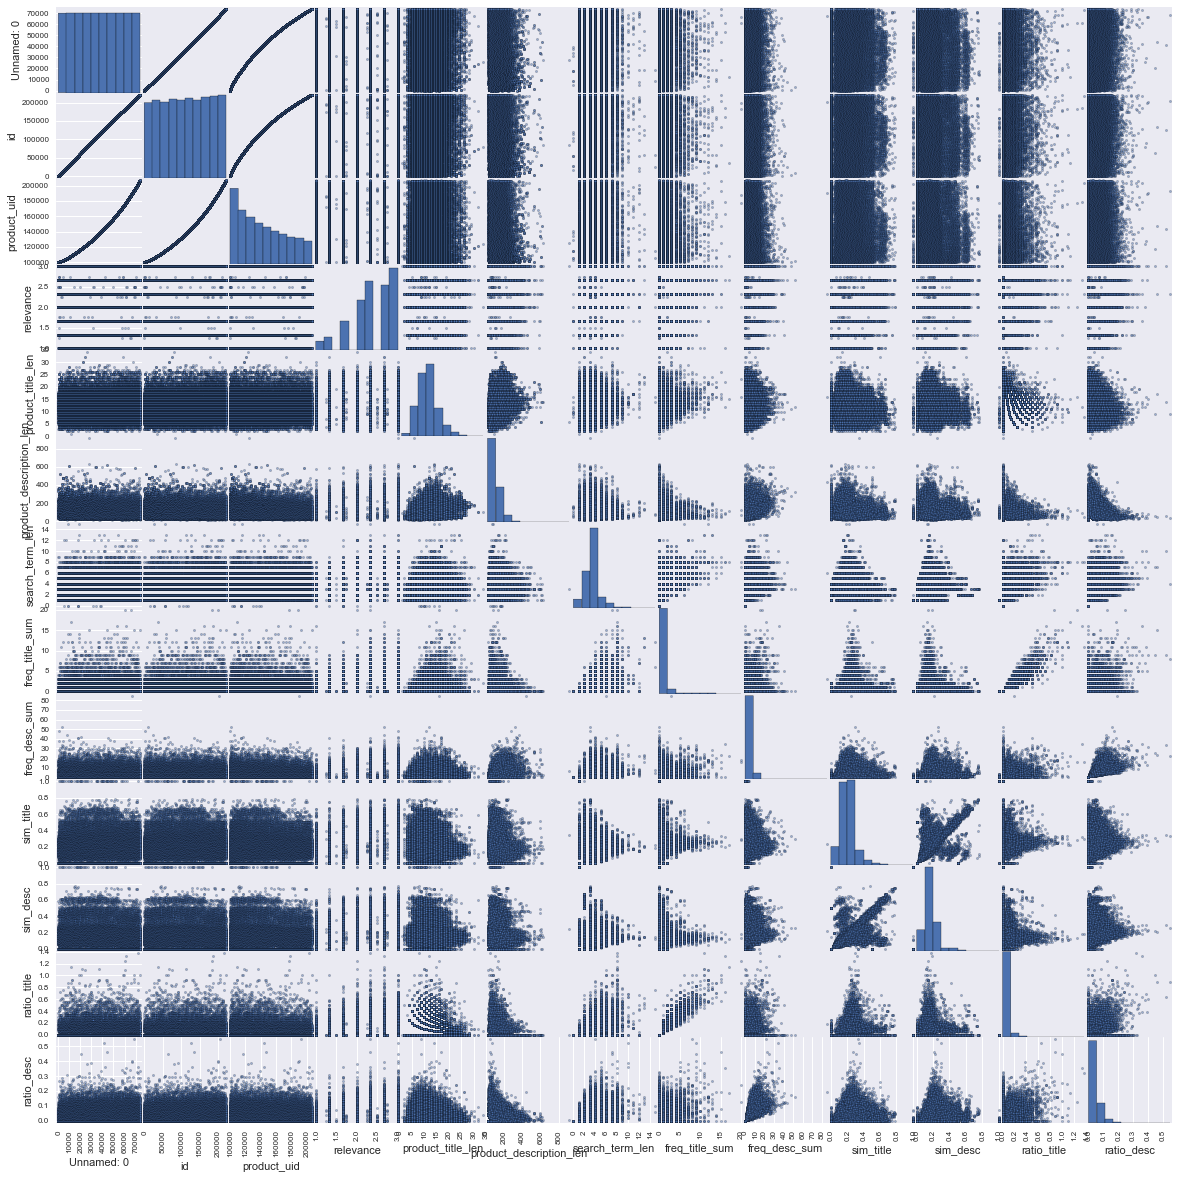

In [7]:
scatter = scatter_matrix(train_merged_f, figsize=(20,20))

In [8]:
def explore1D(df, columns):
    for c in columns:
        df[c].value_counts().plot(kind='bar', title=c)
        plt.show()

In [ ]:
explore1D(train_merged_f, ['relevance', 'product_title_len', 'product_description_len', 'search_term_len', 'freq_title_sum', 'freq_desc_sum'])

In [ ]:
plt.hist(train_merged_f['ratio_title'][train_merged_f['relevance']>0 and train_merged_f['relevance']<=1], alpha=.3)
plt.hist(train_merged_f['ratio_title'][train_merged_f['relevance']>1 and train_merged_f['relevance']<=2], alpha=.3)
plt.hist(train_merged_f['ratio_title'][train_merged_f['relevance']>2 and train_merged_f['relevance']<=3], alpha=.3)
plt.xlabel('search term word count / title word count')
plt.show()

In [49]:
train_merged_f.corr()

,Unnamed: 0,id,product_uid,relevance,product_title_len,product_description_len,search_term_len,freq_title_sum,freq_desc_sum,sim_title,sim_desc,ratio_title,ratio_desc
Unnamed: 0,1.000000,0.999938,0.988454,-0.117630,0.044329,-0.076303,0.186990,0.027200,-0.001298,0.009321,-0.032320,0.023974,0.044603
id,0.999938,1.000000,0.986738,-0.116622,0.043982,-0.076609,0.186103,0.027415,-0.001193,0.010024,-0.031921,0.024217,0.044919
product_uid,0.988454,0.986738,1.000000,-0.130852,0.049022,-0.070966,0.197601,0.023725,-0.002611,-0.000746,-0.037553,0.020046,0.039788
relevance,-0.117630,-0.116622,-0.130852,1.000000,-0.017532,0.045381,-0.058809,0.009345,0.112731,0.154874,0.089961,0.018124,0.101738
product_title_len,0.044329,0.043982,0.049022,-0.017532,1.000000,0.295697,0.152640,0.137152,0.114134,-0.125371,-0.027550,0.039363,-0.039368
product_description_len,-0.076303,-0.076609,-0.070966,0.045381,0.295697,1.000000,0.058451,-0.006000,0.335819,-0.080160,-0.044480,-0.030798,-0.138286
search_term_len,0.186990,0.186103,0.197601,-0.058809,0.152640,0.058451,1.000000,0.379558,0.345916,0.068075,0.073341,0.363582,0.339008
freq_title_sum,0.027200,0.027415,0.023725,0.009345,0.137152,-0.006000,0.379558,1.000000,0.181883,0.094393,-0.028094,0.945386,0.214127
freq_desc_sum,-0.001298,-0.001193,-0.002611,0.112731,0.114134,0.335819,0.345916,0.181883,1.000000,0.171545,0.245008,0.166550,0.760642
sim_title,0.009321,0.010024,-0.000746,0.154874,-0.125371,-0.080160,0.068075,0.094393,0.171545,1.000000,0.741731,0.112986,0.228161


### Random Forests Analysis

In [50]:
from sklearn.ensemble import RandomForestClassifier

In [51]:
train_subtrain = train_merged_f.sample(frac=.6)
train_subtest = train_merged_f.sample(frac=.4)
features = ['product_title_len', 'product_description_len','search_term_len', 'freq_title_sum', 'freq_desc_sum', 'sim_title', 'sim_desc', 'ratio_title', 'ratio_desc']
clf = RandomForestClassifier(n_jobs=6)
y, _ = pd.factorize(train_subtrain['relevance'])
clf.fit(train_subtrain[features], y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=6,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [55]:
importances = clf.feature_importances_
importances_d = zip(features, importances)

In [56]:
importances_d

[('product_title_len', 0.13153585072159085),
 ('product_description_len', 0.19244410598108302),
 ('search_term_len', 0.032024185824176432),
 ('freq_title_sum', 0.013741846609949589),
 ('freq_desc_sum', 0.050794262724438141),
 ('sim_title', 0.21711255865371309),
 ('sim_desc', 0.20656885773852524),
 ('ratio_title', 0.025062429961464478),
 ('ratio_desc', 0.13071590178505921)]